## **Import library**

In [ ]:
!pip install mlxtend

In [ ]:
# get thai font
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

In [ ]:
# install thai font
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

import pandas as pd
from google.colab import drive
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from scipy.spatial.distance import cosine

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Import data**

In [ ]:
df = pd.read_csv('drive/MyDrive/CRM/FormResponses.csv')
df.tail(5)

Timestamp playstation5  ...        ยาดม ไฟส่องหน้าไลฟ์สด
42  10/17/2021 17:46:06   ไม่เคยซื้อ  ...     เคยซื้อ       ไม่เคยซื้อ
43  10/17/2021 17:46:07   ไม่เคยซื้อ  ...     เคยซื้อ       ไม่เคยซื้อ
44  10/17/2021 17:46:17   ไม่เคยซื้อ  ...     เคยซื้อ       ไม่เคยซื้อ
45  10/17/2021 17:46:29   ไม่เคยซื้อ  ...  ไม่เคยซื้อ       ไม่เคยซื้อ
46  10/17/2021 17:46:31   ไม่เคยซื้อ  ...     เคยซื้อ       ไม่เคยซื้อ

[5 rows x 42 columns]

## **Prepare data**

In [ ]:
# column ps5 is dupplicated
df.columns

Index(['Timestamp', 'playstation5', 'เครื่องทำขนมปัง', 'Ergonomic Wrist Rest',
       'เครื่องอบผ้า', 'เครื่องชงกาแฟแคปซูล', 'เก้าอี้ LA-Z-Boy',
       'เครื่องให้อาหารสัตว์อัตโนมัติ', 'บัตตาเลี่ยน', 'แก้วเก็บความเย็น',
       'ลู่วิ่งออกกำลังกาย', 'Kindle', 'เครื่องซักผ้า', 'Bluetooth Speaker',
       'ห้องน้ำแมวอัตโนมัติ', 'PS5', 'ทรายแมว', 'ลำโพง pixel',
       'Logitech Mx Master 3 Mouse', 'ตุ๊กตา ty', 'น้ำพุแมว', 'Robot ดูดฝุ่น',
       'Mechanical keyboard', 'Nintendo switch', 'หนังสือ python',
       'gaming chair', 'Deskmat', 'Dew - ไฟโรเซ่', 'เทียนหอม jo malone',
       'กระติกน้ำ 2 ลิตร', 'ที่นอน memory form', 'พลาสเตอร์บรรเทาปวด ตราเสือ',
       'การ์ดจอ RTX 3080', 'ขนมจีนน้ำยาปู', 'Salmon Sashimi',
       'จักรยานเสือหมอบ', 'ไฟแต่งห้องมินิมอล', 'External Harddisk',
       'หม้อทอดไร้น้ํามัน', 'airpods ', 'ยาดม', 'ไฟส่องหน้าไลฟ์สด'],
      dtype='object')

In [ ]:
# delete duplicate columns
df = df.drop(['Timestamp', 'PS5'], axis=1)
df.tail(5)

playstation5 เครื่องทำขนมปัง  ...        ยาดม ไฟส่องหน้าไลฟ์สด
42   ไม่เคยซื้อ         เคยซื้อ  ...     เคยซื้อ       ไม่เคยซื้อ
43   ไม่เคยซื้อ      ไม่เคยซื้อ  ...     เคยซื้อ       ไม่เคยซื้อ
44   ไม่เคยซื้อ      ไม่เคยซื้อ  ...     เคยซื้อ       ไม่เคยซื้อ
45   ไม่เคยซื้อ      ไม่เคยซื้อ  ...  ไม่เคยซื้อ       ไม่เคยซื้อ
46   ไม่เคยซื้อ      ไม่เคยซื้อ  ...     เคยซื้อ       ไม่เคยซื้อ

[5 rows x 40 columns]

In [ ]:
# check raw data
print(list(df))
print(len(list(df)))

for column_name in list(df):
    df[column_name].fillna(df[column_name].mode()[0], inplace=True)
    print(sorted(df[column_name].unique()))

['playstation5', 'เครื่องทำขนมปัง', 'Ergonomic Wrist Rest', 'เครื่องอบผ้า', 'เครื่องชงกาแฟแคปซูล', 'เก้าอี้ LA-Z-Boy', 'เครื่องให้อาหารสัตว์อัตโนมัติ', 'บัตตาเลี่ยน', 'แก้วเก็บความเย็น', 'ลู่วิ่งออกกำลังกาย', 'Kindle', 'เครื่องซักผ้า', 'Bluetooth Speaker', 'ห้องน้ำแมวอัตโนมัติ', 'ทรายแมว', 'ลำโพง pixel', 'Logitech Mx Master 3 Mouse', 'ตุ๊กตา ty', 'น้ำพุแมว', 'Robot ดูดฝุ่น', 'Mechanical keyboard', 'Nintendo switch', 'หนังสือ python', 'gaming chair', 'Deskmat', 'Dew - ไฟโรเซ่', 'เทียนหอม jo malone', 'กระติกน้ำ 2 ลิตร', 'ที่นอน memory form', 'พลาสเตอร์บรรเทาปวด ตราเสือ', 'การ์ดจอ RTX 3080', 'ขนมจีนน้ำยาปู', 'Salmon Sashimi', 'จักรยานเสือหมอบ', 'ไฟแต่งห้องมินิมอล', 'External Harddisk', 'หม้อทอดไร้น้ํามัน', 'airpods ', 'ยาดม', 'ไฟส่องหน้าไลฟ์สด']
40
['เคยซื้อ', 'ไม่เคยซื้อ']
['เคยซื้อ', 'ไม่เคยซื้อ']
['เคยซื้อ', 'ไม่เคยซื้อ']
['เคยซื้อ', 'ไม่เคยซื้อ']
['เคยซื้อ', 'ไม่เคยซื้อ']
['เคยซื้อ', 'ไม่เคยซื้อ']
['เคย', 'ไม่เคย']
['เคยซื้อ', 'ไม่เคยซื้อ']
['เคยซื้อ', 'ไม่เคยซื้อ']
['เคย', 'ไม่เคย']


In [ ]:
# fix data (replace value)
df = df.replace(dict.fromkeys(['เคย','เคยซื้อ'], 1))
df = df.replace(dict.fromkeys(['ไม่','ไม่เคย','ไม่เคยซื้อ','ไม่เคยซือ'], 0))
df.tail(5)

playstation5  เครื่องทำขนมปัง  ...  ยาดม  ไฟส่องหน้าไลฟ์สด
42             0                1  ...     1                 0
43             0                0  ...     1                 0
44             0                0  ...     1                 0
45             0                0  ...     0                 0
46             0                0  ...     1                 0

[5 rows x 40 columns]

In [ ]:
# check value
for column_name in list(df):
        print(sorted(df[column_name].unique()))

[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]


In [ ]:
missing = df.isnull().sum()
print(missing)

playstation5                     0
เครื่องทำขนมปัง                  0
Ergonomic Wrist Rest             0
เครื่องอบผ้า                     0
เครื่องชงกาแฟแคปซูล              0
เก้าอี้ LA-Z-Boy                 0
เครื่องให้อาหารสัตว์อัตโนมัติ    0
บัตตาเลี่ยน                      0
แก้วเก็บความเย็น                 0
ลู่วิ่งออกกำลังกาย               0
Kindle                           0
เครื่องซักผ้า                    0
Bluetooth Speaker                0
ห้องน้ำแมวอัตโนมัติ              0
ทรายแมว                          0
ลำโพง pixel                      0
Logitech Mx Master 3 Mouse       0
ตุ๊กตา ty                        0
น้ำพุแมว                         0
Robot ดูดฝุ่น                    0
Mechanical keyboard              0
Nintendo switch                  0
หนังสือ python                   0
gaming chair                     0
Deskmat                          0
Dew - ไฟโรเซ่                    0
เทียนหอม jo malone               0
กระติกน้ำ 2 ลิตร                 0
ที่นอน memory form  

## **Basic explore**

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/tools.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


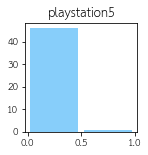

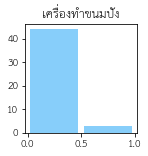

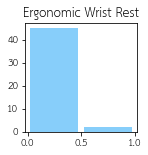

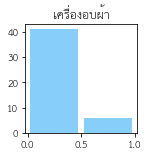

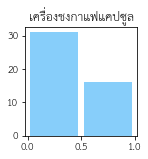

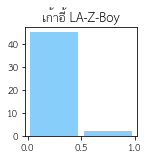

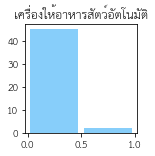

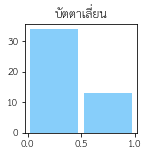

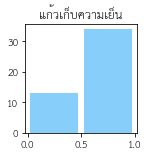

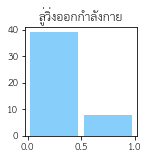

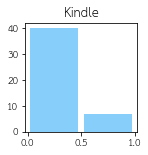

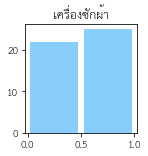

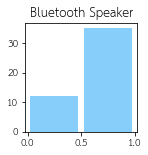

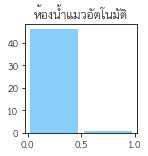

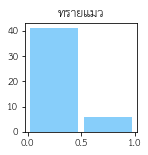

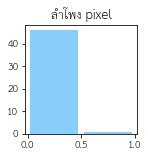

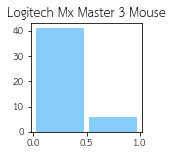

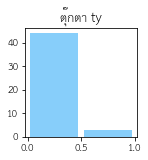

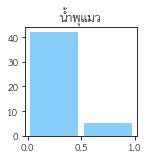

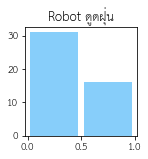

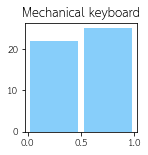

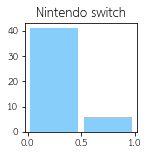

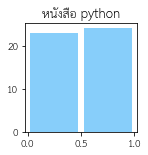

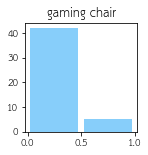

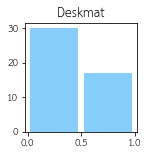

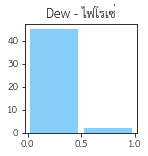

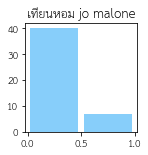

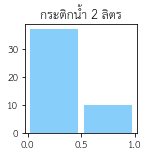

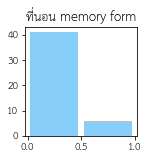

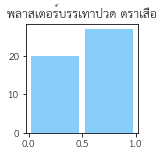

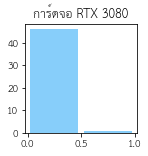

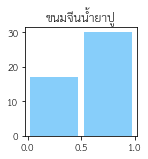

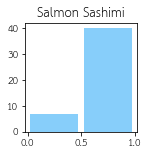

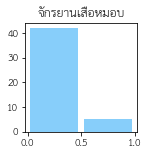

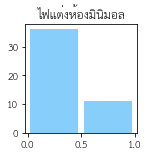

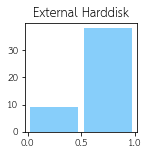

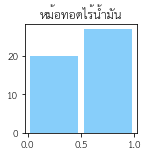

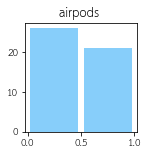

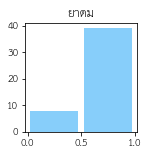

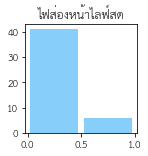

In [ ]:
import matplotlib.pyplot as plt
for column_name in list(df):
    ax = df.hist(column=column_name, bins=2, grid=False, figsize=(2,2), color='#87CEFA', zorder=2, rwidth=0.9)

In [ ]:
# sorted data by popularity
df_tmp = df.sum(axis = 0)
df_temp = df_tmp.sort_values(ascending=False)
df_temp

Salmon Sashimi                   40
ยาดม                             39
External Harddisk                38
Bluetooth Speaker                35
แก้วเก็บความเย็น                 34
ขนมจีนน้ำยาปู                    30
หม้อทอดไร้น้ํามัน                27
พลาสเตอร์บรรเทาปวด ตราเสือ       27
เครื่องซักผ้า                    25
Mechanical keyboard              25
หนังสือ python                   24
airpods                          21
Deskmat                          17
Robot ดูดฝุ่น                    16
เครื่องชงกาแฟแคปซูล              16
บัตตาเลี่ยน                      13
ไฟแต่งห้องมินิมอล                11
กระติกน้ำ 2 ลิตร                 10
ลู่วิ่งออกกำลังกาย                8
เทียนหอม jo malone                7
Kindle                            7
ทรายแมว                           6
เครื่องอบผ้า                      6
ไฟส่องหน้าไลฟ์สด                  6
Logitech Mx Master 3 Mouse        6
Nintendo switch                   6
ที่นอน memory form                6
น้ำพุแมว                    

## **Market basket**

In [ ]:
# analysis part
# market basket
frequent_itemsets = apriori(df, use_colnames = True)
frequent_itemsets

support                                           itemsets
0   0.723404                                 (แก้วเก็บความเย็น)
1   0.531915                                    (เครื่องซักผ้า)
2   0.744681                                (Bluetooth Speaker)
3   0.531915                              (Mechanical keyboard)
4   0.510638                                   (หนังสือ python)
5   0.574468                       (พลาสเตอร์บรรเทาปวด ตราเสือ)
6   0.638298                                    (ขนมจีนน้ำยาปู)
7   0.851064                                   (Salmon Sashimi)
8   0.808511                                (External Harddisk)
9   0.574468                                (หม้อทอดไร้น้ํามัน)
10  0.829787                                             (ยาดม)
11  0.531915              (Bluetooth Speaker, แก้วเก็บความเย็น)
12  0.574468                 (แก้วเก็บความเย็น, Salmon Sashimi)
13  0.595745              (แก้วเก็บความเย็น, External Harddisk)
14  0.617021                           (ยาดม, แก้วเก็บความเย็น)
15  0.638298                (Bluetooth Speaker, Salmon Sashimi)
16  0.617021             (Bluetooth Speaker, External Harddisk)
17  0.659574                          (Bluetooth Speaker, ยาดม)
18  0.531915       (พลาสเตอร์บรรเทาปวด ตราเสือ, Salmon Sashimi)
19  0.510638    (พลาสเตอร์บรรเทาปวด ตราเสือ, External Harddisk)
20  0.553191                 (พลาสเตอร์บรรเทาปวด ตราเสือ, ยาดม)
21  0.574468                    (ขนมจีนน้ำยาปู, Salmon Sashimi)
22  0.510638                 (ขนมจีนน้ำยาปู, External Harddisk)
23  0.531915                              (ขนมจีนน้ำยาปู, ยาดม)
24  0.680851                (Salmon Sashimi, External Harddisk)
25  0.744681                             (ยาดม, Salmon Sashimi)
26  0.531915             (External Harddisk, หม้อทอดไร้น้ํามัน)
27  0.680851                          (ยาดม, External Harddisk)
28  0.531915           (ยาดม, แก้วเก็บความเย็น, Salmon Sashimi)
29  0.531915  (Bluetooth Speaker, Salmon Sashimi, External H...
30  0.574468          (Bluetooth Speaker, ยาดม, Salmon Sashimi)
31  0.574468       (Bluetooth Speaker, ยาดม, External Harddisk)
32  0.531915  (พลาสเตอร์บรรเทาปวด ตราเสือ, ยาดม, Salmon Sash...
33  0.510638              (ขนมจีนน้ำยาปู, ยาดม, Salmon Sashimi)
34  0.617021          (ยาดม, Salmon Sashimi, External Harddisk)
35  0.510638  (Bluetooth Speaker, ยาดม, Salmon Sashimi, Exte...

In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head(10)

antecedents          consequents  ...  leverage  conviction
0   (แก้วเก็บความเย็น)  (External Harddisk)  ...  0.010865    1.085106
1  (External Harddisk)   (แก้วเก็บความเย็น)  ...  0.010865    1.051064
2               (ยาดม)   (แก้วเก็บความเย็น)  ...  0.016750    1.078723
3   (แก้วเก็บความเย็น)               (ยาดม)  ...  0.016750    1.157447
4  (Bluetooth Speaker)     (Salmon Sashimi)  ...  0.004527    1.042553
5     (Salmon Sashimi)  (Bluetooth Speaker)  ...  0.004527    1.021277
6  (Bluetooth Speaker)  (External Harddisk)  ...  0.014939    1.117021
7  (External Harddisk)  (Bluetooth Speaker)  ...  0.014939    1.078014
8  (Bluetooth Speaker)               (ยาดม)  ...  0.041648    1.489362
9               (ยาดม)  (Bluetooth Speaker)  ...  0.041648    1.244681

[10 rows x 9 columns]

In [ ]:
# filter rule
rules[ (rules['lift'] >= 1) & (rules['confidence'] >= 0.5) & (rules['support'] >= 0.6) ]

antecedents  ... conviction
2                                (ยาดม)  ...   1.078723
3                    (แก้วเก็บความเย็น)  ...   1.157447
4                   (Bluetooth Speaker)  ...   1.042553
5                      (Salmon Sashimi)  ...   1.021277
6                   (Bluetooth Speaker)  ...   1.117021
7                   (External Harddisk)  ...   1.078014
8                   (Bluetooth Speaker)  ...   1.489362
9                                (ยาดม)  ...   1.244681
20                               (ยาดม)  ...   1.452128
21                     (Salmon Sashimi)  ...   1.361702
24                               (ยาดม)  ...   1.066869
25                  (External Harddisk)  ...   1.078014
60               (ยาดม, Salmon Sashimi)  ...   1.117021
61            (ยาดม, External Harddisk)  ...   1.588652
62  (Salmon Sashimi, External Harddisk)  ...   1.815603
63                               (ยาดม)  ...   1.244681
64                     (Salmon Sashimi)  ...   1.160542
65                  (External Harddisk)  ...   1.078014

[18 rows x 9 columns]

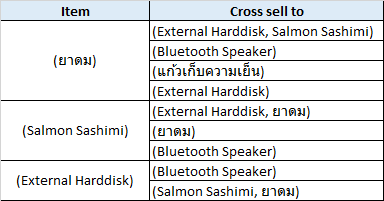

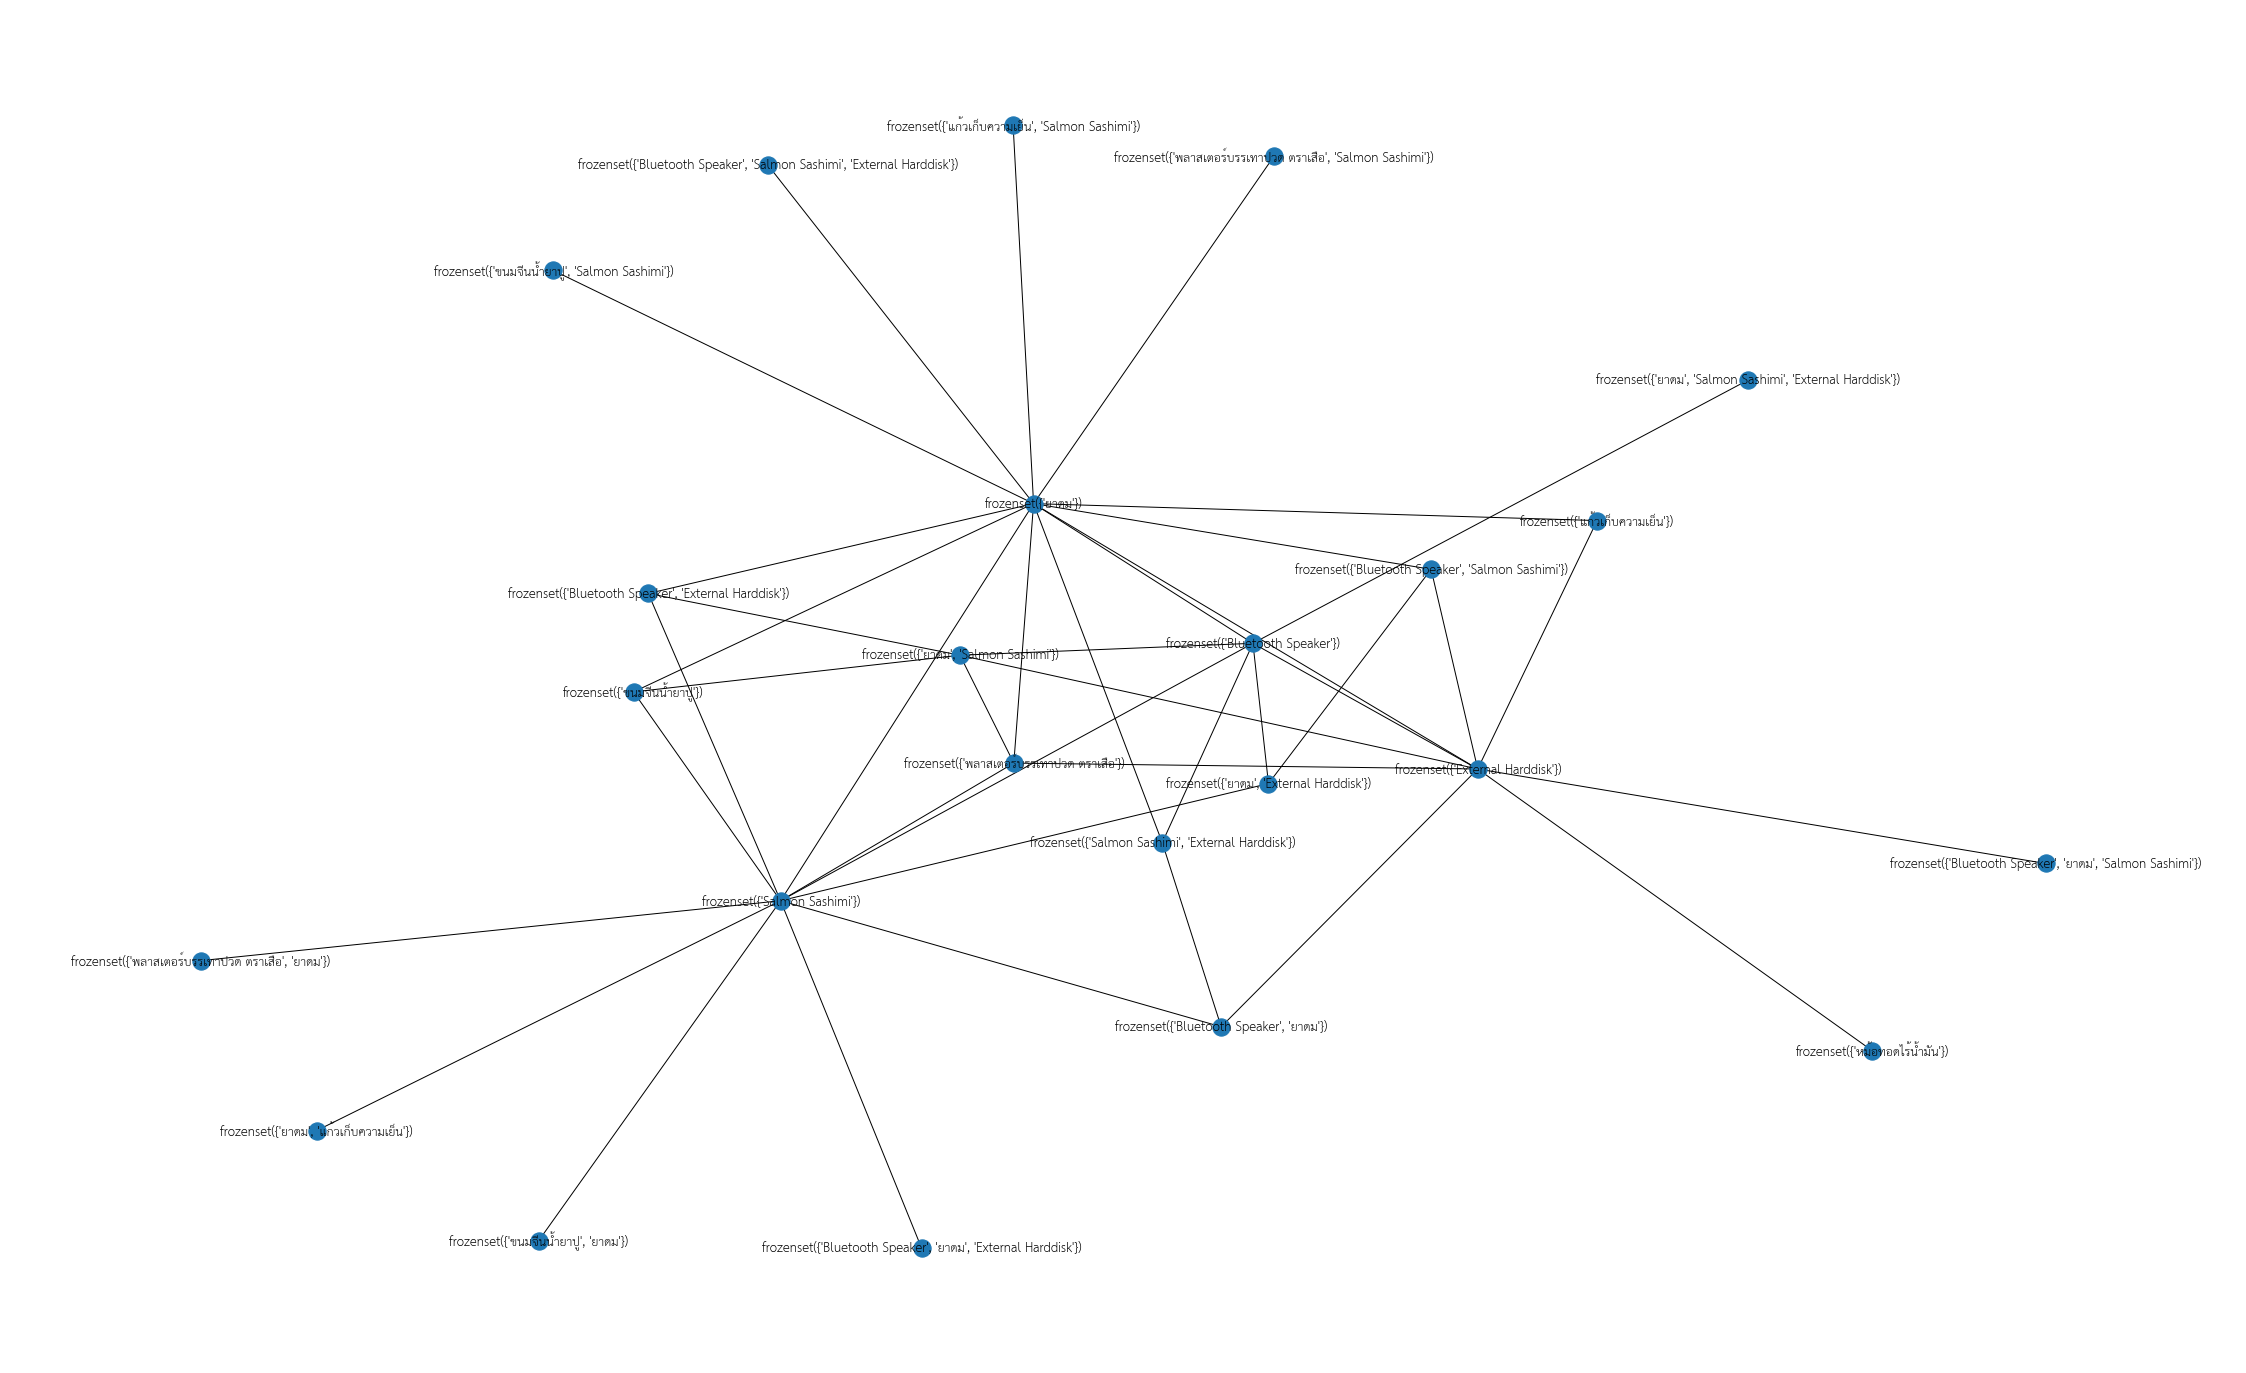

In [ ]:
import networkx as nx

fig, ax=plt.subplots(figsize=(40,25))
GA=nx.from_pandas_edgelist(rules,source='antecedents',target='consequents')
nx.draw(GA, with_labels=True, font_family='TH Sarabun New')
plt.show()

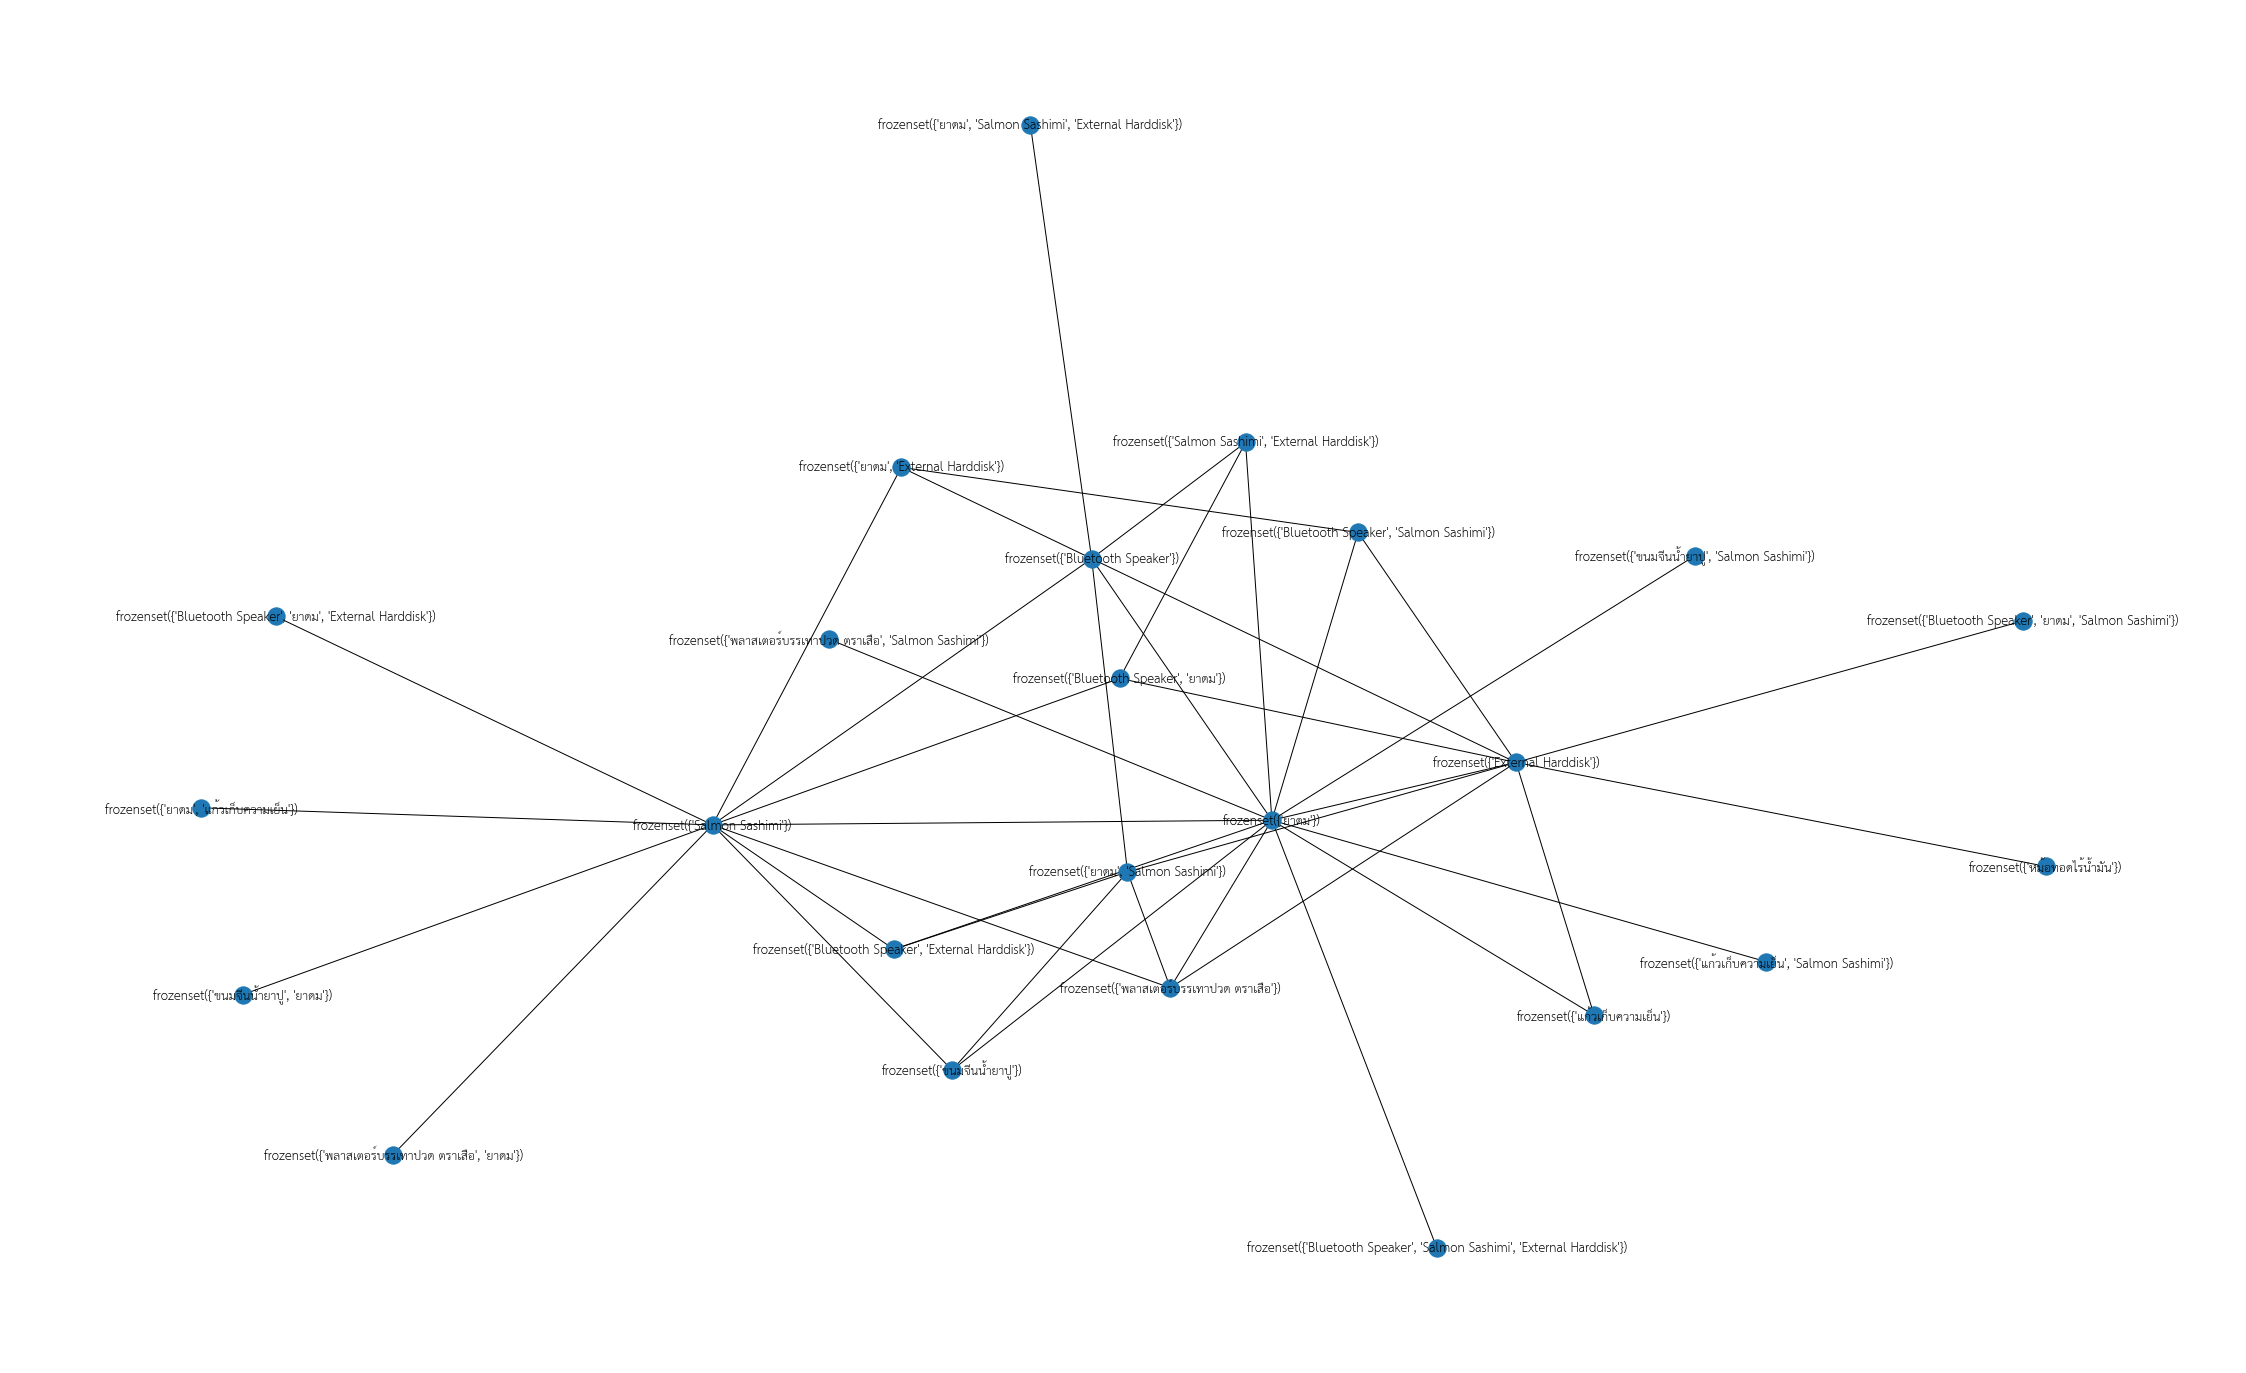

In [ ]:
fig, ax=plt.subplots(figsize=(40,25)) 
nx.draw_spring(GA, with_labels=True, font_family='TH Sarabun New')  

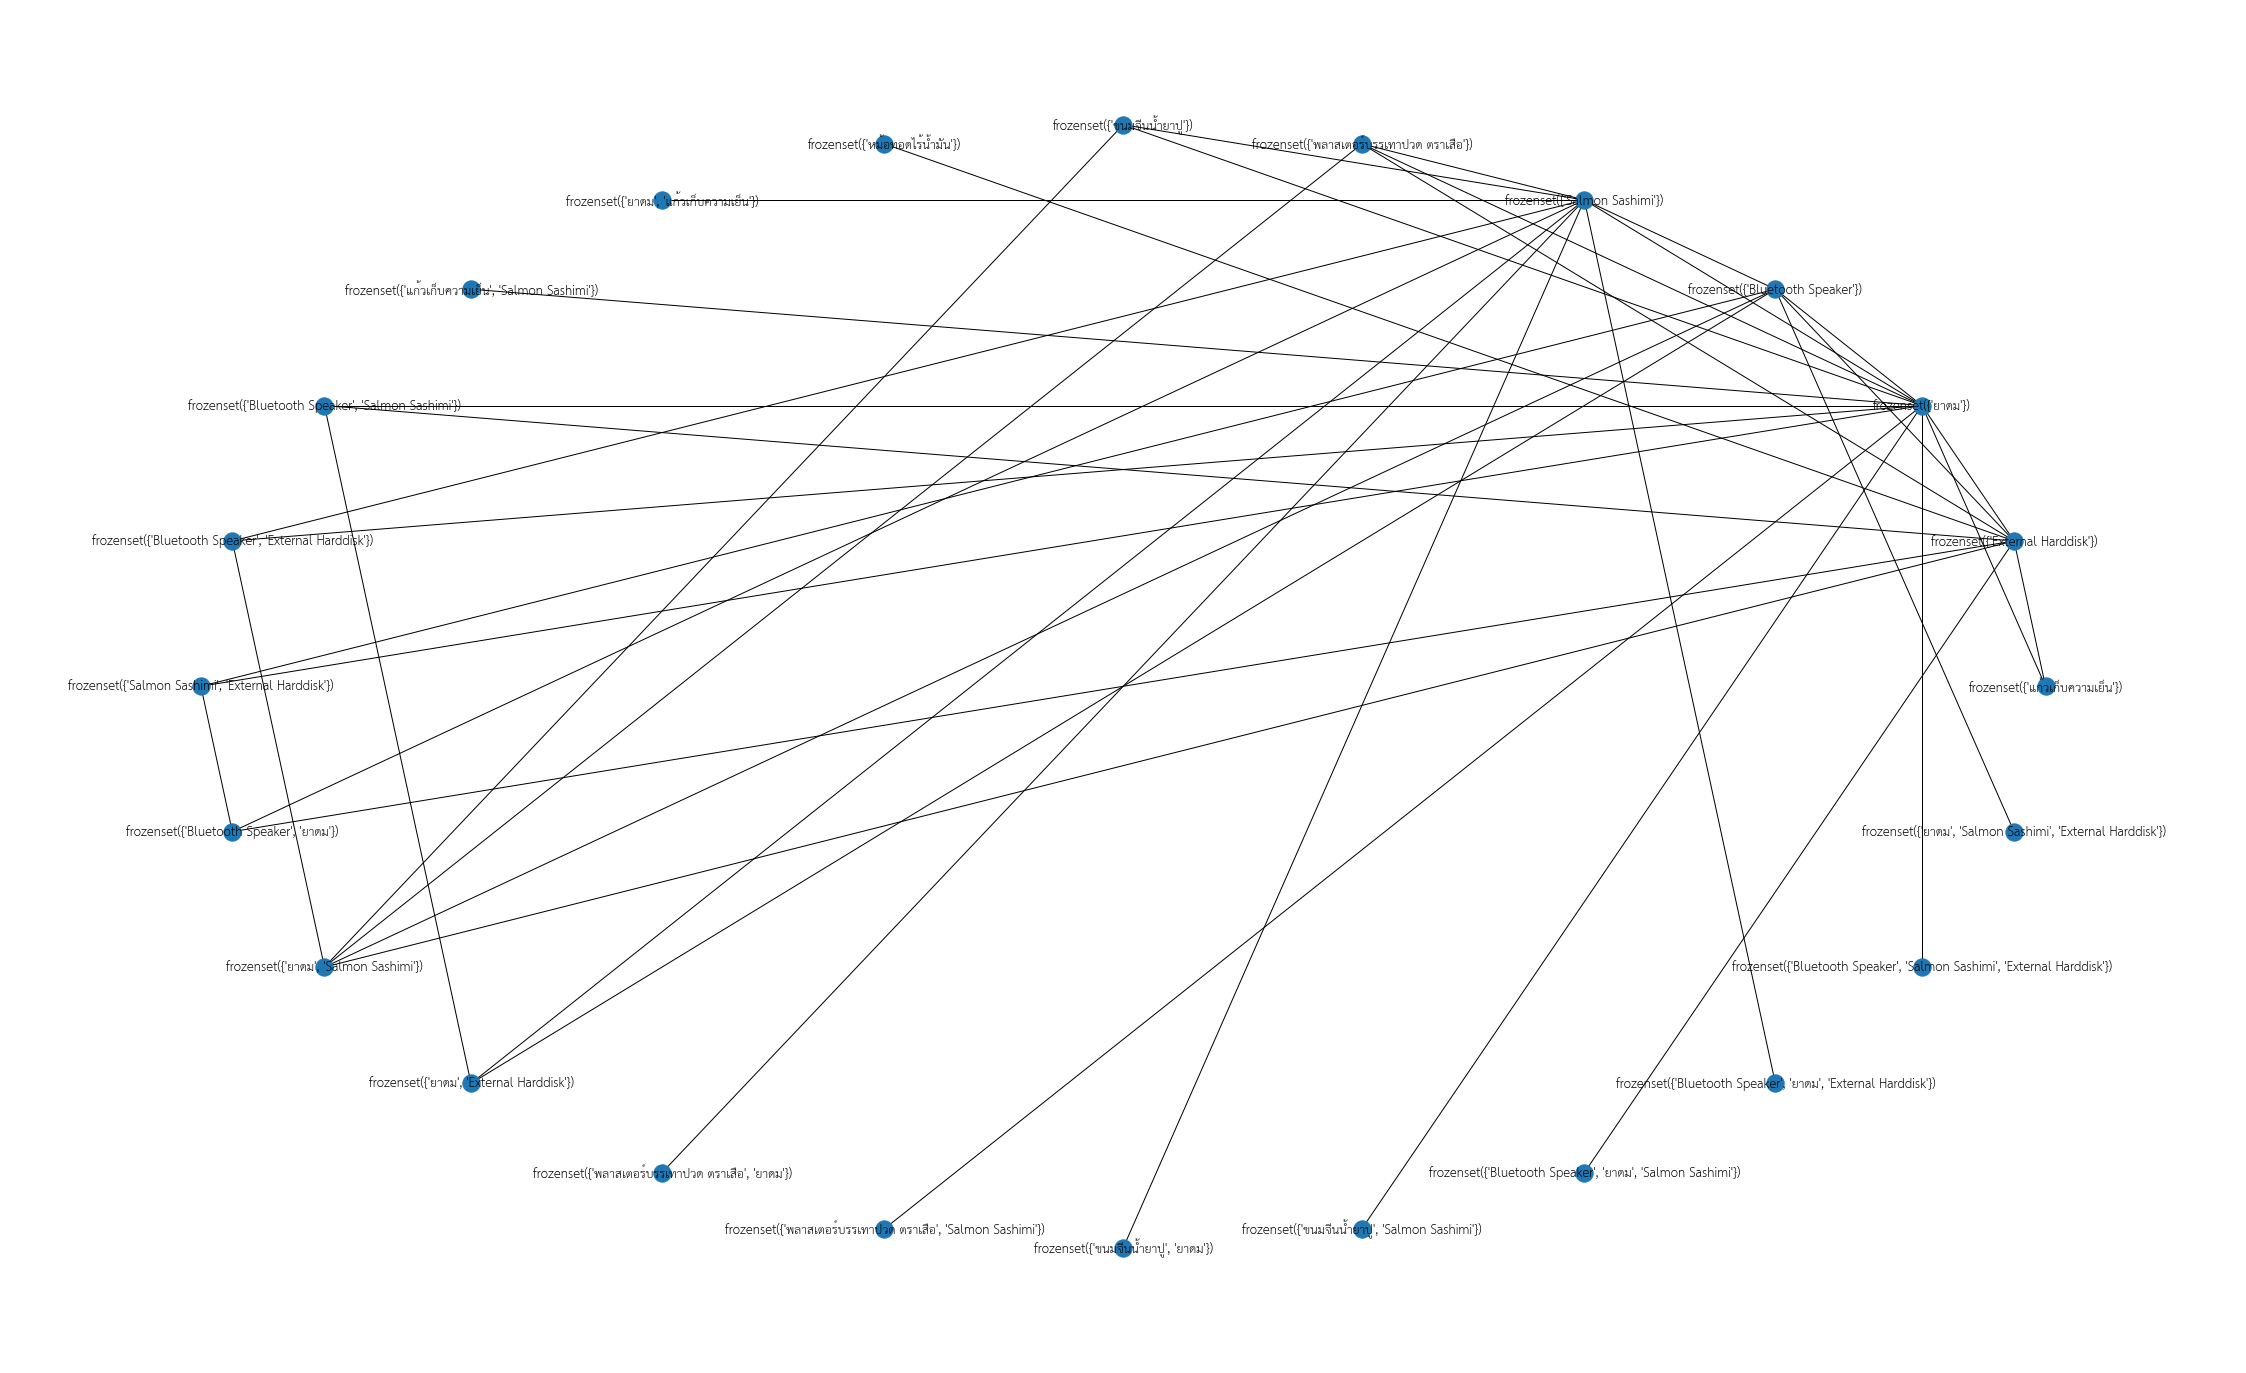

In [ ]:
fig, ax=plt.subplots(figsize=(40,25))
nx.draw_circular(GA, with_labels=True, font_family='TH Sarabun New') 

## **Collaborative filtering**

In [ ]:
# collaborative filtering using item-item matrix
# create null item-item dataframe
item_item_matrix = pd.DataFrame(index=df.columns,columns=df.columns)
item_item_matrix.tail()

playstation5 เครื่องทำขนมปัง  ... ยาดม ไฟส่องหน้าไลฟ์สด
External Harddisk          NaN             NaN  ...  NaN              NaN
หม้อทอดไร้น้ํามัน          NaN             NaN  ...  NaN              NaN
airpods                    NaN             NaN  ...  NaN              NaN
ยาดม                       NaN             NaN  ...  NaN              NaN
ไฟส่องหน้าไลฟ์สด           NaN             NaN  ...  NaN              NaN

[5 rows x 40 columns]

In [ ]:
# fill data 
for i in range(0,len(item_item_matrix.columns)) :
    # Loop through the columns for each column
    for j in range(0,len(item_item_matrix.columns)) :
      # Fill in placeholder with cosine similarities
      item_item_matrix.iloc[i,j] = 1 -cosine(df.iloc[:,i],df.iloc[:,j])
item_item_matrix.tail()

playstation5 เครื่องทำขนมปัง  ...      ยาดม ไฟส่องหน้าไลฟ์สด
External Harddisk     0.162221        0.280976  ...  0.831239         0.264906
หม้อทอดไร้น้ํามัน      0.19245        0.333333  ...  0.677967          0.31427
airpods                      0        0.251976  ...  0.663914         0.356348
ยาดม                  0.160128         0.27735  ...         1         0.261488
ไฟส่องหน้าไลฟ์สด             0        0.235702  ...  0.261488                1

[5 rows x 40 columns]

In [ ]:
missing = item_item_matrix.isnull().sum()
print(missing)

playstation5                     0
เครื่องทำขนมปัง                  0
Ergonomic Wrist Rest             0
เครื่องอบผ้า                     0
เครื่องชงกาแฟแคปซูล              0
เก้าอี้ LA-Z-Boy                 0
เครื่องให้อาหารสัตว์อัตโนมัติ    0
บัตตาเลี่ยน                      0
แก้วเก็บความเย็น                 0
ลู่วิ่งออกกำลังกาย               0
Kindle                           0
เครื่องซักผ้า                    0
Bluetooth Speaker                0
ห้องน้ำแมวอัตโนมัติ              0
ทรายแมว                          0
ลำโพง pixel                      0
Logitech Mx Master 3 Mouse       0
ตุ๊กตา ty                        0
น้ำพุแมว                         0
Robot ดูดฝุ่น                    0
Mechanical keyboard              0
Nintendo switch                  0
หนังสือ python                   0
gaming chair                     0
Deskmat                          0
Dew - ไฟโรเซ่                    0
เทียนหอม jo malone               0
กระติกน้ำ 2 ลิตร                 0
ที่นอน memory form  

In [ ]:
links = item_item_matrix.rename_axis('related item', axis='columns').stack().reset_index()
links.columns = ['item', 'related item','value']
links.tail()

item       related item     value
1595  ไฟส่องหน้าไลฟ์สด  External Harddisk  0.264906
1596  ไฟส่องหน้าไลฟ์สด  หม้อทอดไร้น้ํามัน   0.31427
1597  ไฟส่องหน้าไลฟ์สด           airpods   0.356348
1598  ไฟส่องหน้าไลฟ์สด               ยาดม  0.261488
1599  ไฟส่องหน้าไลฟ์สด   ไฟส่องหน้าไลฟ์สด         1

In [ ]:
# sorted
links_filtered = links.loc[ (links['value'] > 0.1) & (links['item'] != links['related item']) ]
sorted_links_filtered = links_filtered.sort_values(by='value', ascending=False)
sorted_links_filtered[sorted_links_filtered['value'].values > 0.75]

item                related item     value
734                     น้ำพุแมว                     ทรายแมว  0.912871
578                      ทรายแมว                    น้ำพุแมว  0.912871
1552                        ยาดม              Salmon Sashimi  0.886147
1318              Salmon Sashimi                        ยาดม  0.886147
1532                        ยาดม           Bluetooth Speaker  0.839065
518            Bluetooth Speaker                        ยาดม  0.839065
1438           External Harddisk                        ยาดม  0.831239
1555                        ยาดม           External Harddisk  0.831239
1315              Salmon Sashimi           External Harddisk  0.820783
1432           External Harddisk              Salmon Sashimi  0.820783
1292              Salmon Sashimi           Bluetooth Speaker  0.801784
512            Bluetooth Speaker              Salmon Sashimi  0.801784
1549                        ยาดม  พลาสเตอร์บรรเทาปวด ตราเสือ  0.801234
1198  พลาสเตอร์บรรเทาปวด ตราเสือ                        ยาดม  0.801234
358             แก้วเก็บความเย็น                        ยาดม  0.796391
1528                        ยาดม            แก้วเก็บความเย็น  0.796391
515            Bluetooth Speaker           External Harddisk  0.795192
1412           External Harddisk           Bluetooth Speaker  0.795192
1475           หม้อทอดไร้น้ํามัน           External Harddisk  0.780488
1436           External Harddisk           หม้อทอดไร้น้ํามัน  0.780488
1311              Salmon Sashimi               ขนมจีนน้ำยาปู  0.779423
1272               ขนมจีนน้ำยาปู              Salmon Sashimi  0.779423
355             แก้วเก็บความเย็น           External Harddisk  0.778981
1408           External Harddisk            แก้วเก็บความเย็น  0.778981
1451           หม้อทอดไร้น้ํามัน               เครื่องซักผ้า    0.7698
476                เครื่องซักผ้า           หม้อทอดไร้น้ํามัน    0.7698
1192  พลาสเตอร์บรรเทาปวด ตราเสือ              Salmon Sashimi  0.760726
1309              Salmon Sashimi  พลาสเตอร์บรรเทาปวด ตราเสือ  0.760726
356             แก้วเก็บความเย็น           หม้อทอดไร้น้ํามัน  0.759113
1448           หม้อทอดไร้น้ํามัน            แก้วเก็บความเย็น  0.759113

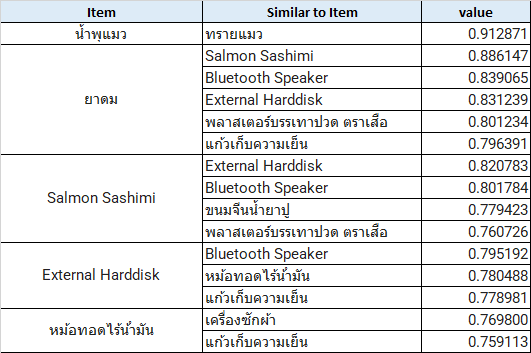

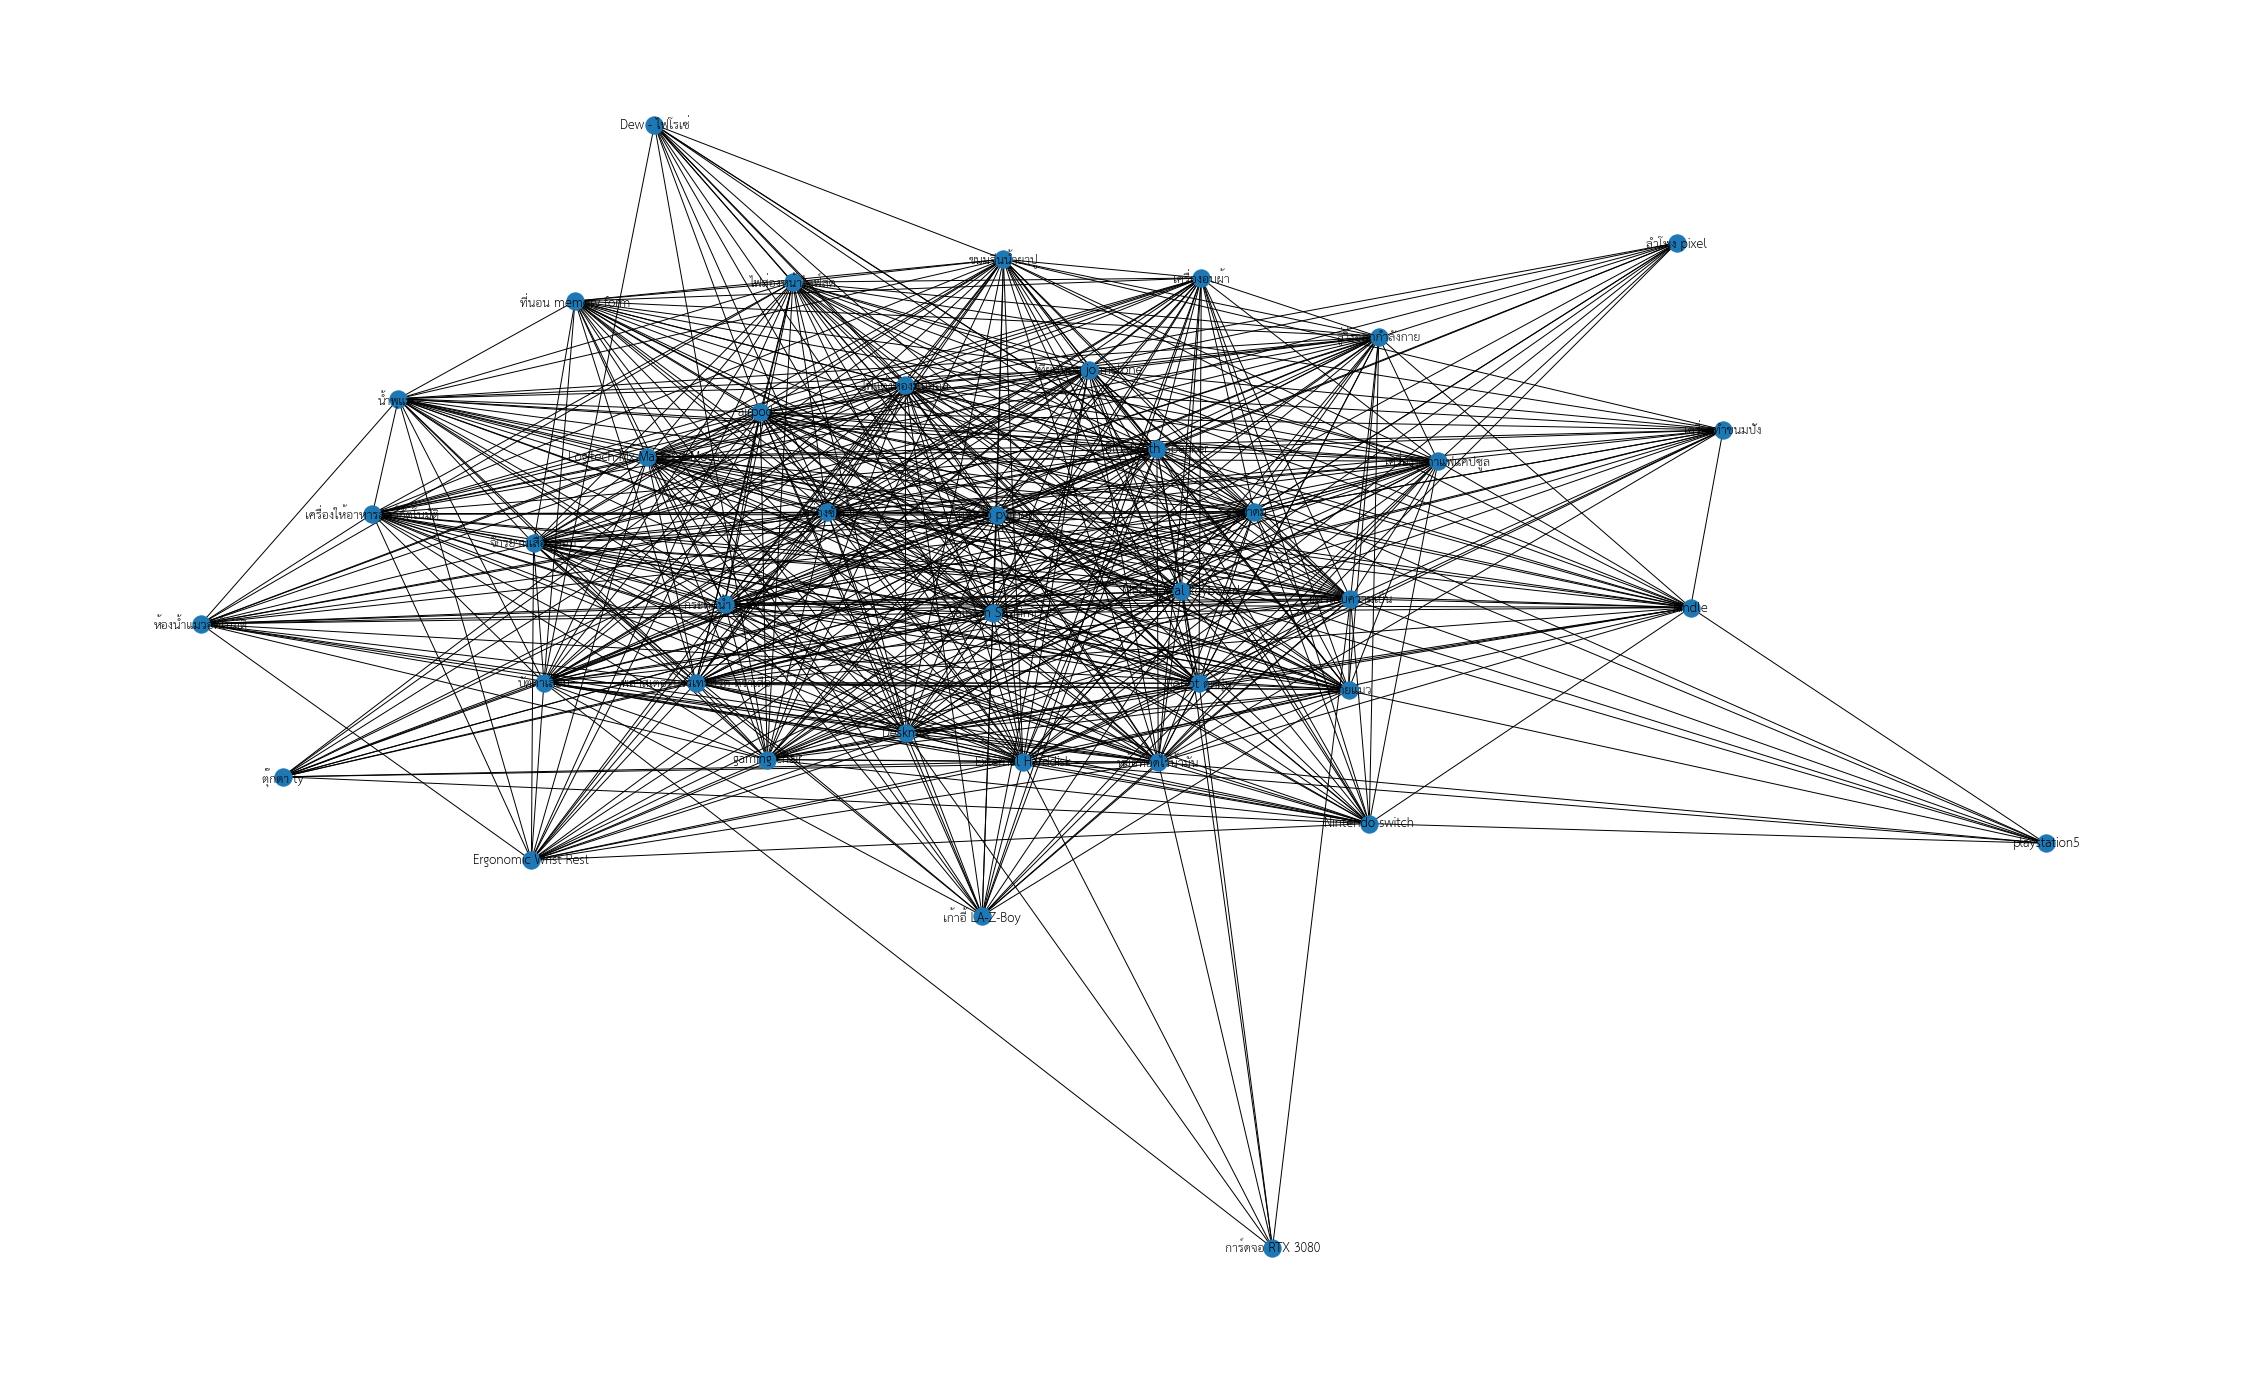

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

fig, ax=plt.subplots(figsize=(40,25))
GA=nx.from_pandas_edgelist(links_filtered,source='item',target='related item')
nx.draw(GA,with_labels=True, font_family='TH Sarabun New')
plt.show()

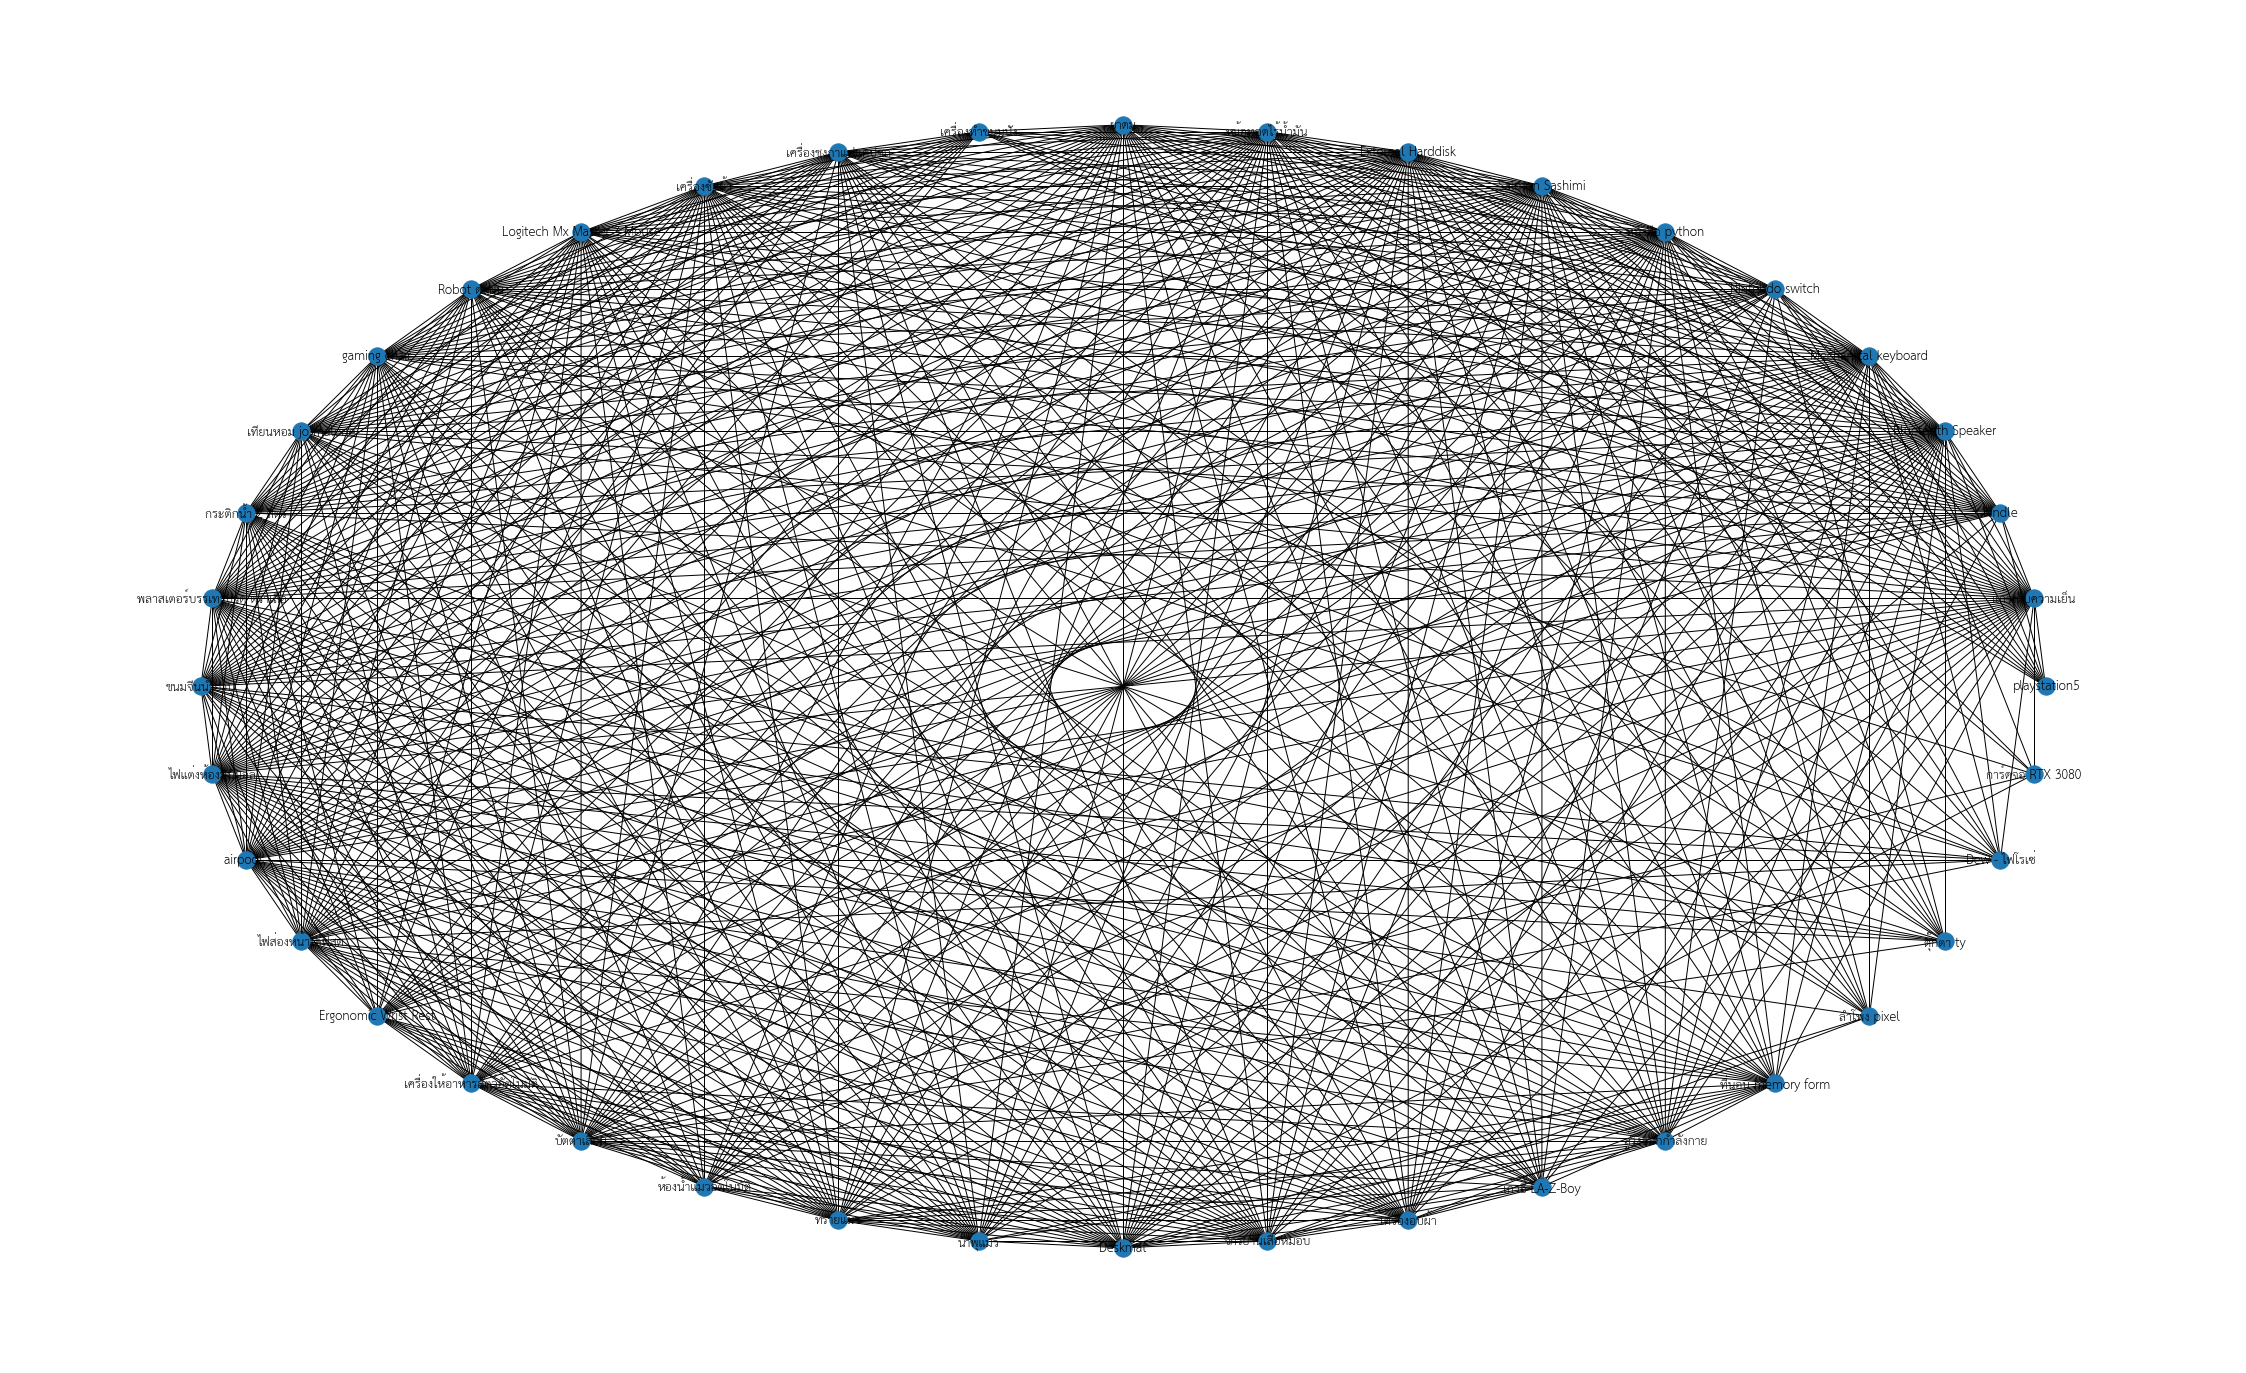

In [ ]:
fig, ax=plt.subplots(figsize=(40,25))
nx.draw_circular(GA,with_labels=True, font_family='TH Sarabun New')